Description

The Hallmarks of Cancer Corpus for text classification

The Hallmarks of Cancer (HOC) Corpus consists of 1852 PubMed publication abstracts manually annotated by experts according to a taxonomy. The taxonomy consists of 37 classes in a hierarchy. Zero or more class labels are assigned to each sentence in the corpus. The labels are found under the "labels" directory, while the tokenized text can be found under "text" directory. The filenames are the corresponding PubMed IDs (PMID).

Dataset
HoC Corpus - https://github.com/sb895/Hallmarks-of-Cancer

Problem Statemtent :
    Suggest the tags based on the content that was there in the document

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

performance metrics :

for this dataset we have class imbalance, choosing micro f1 score

In [349]:
import os
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk
from sklearn.model_selection import train_test_split
import re
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [350]:
directory = os.listdir('text')
directory = sorted(directory)

In [351]:
text_data = list()
labels_data = list()
for i in directory:
    f = open('text/'+i,mode='r')
    text_data += f.readlines()
    f.close()
    f = open('labels/'+i,mode='r')
    labels = f.readlines()
    labels = ' '.join(labels)
    labels =  list(labels.split('<')[1:])
    for j in range(len(labels)):
        no_class = labels[j].split('AND')
        if len(no_class)>1:
            labels[j] = ','.join([k.strip() for k in no_class])
        elif len(labels[j].strip())<1:
            labels[j] = np.nan
        elif labels[j].strip()=='NULL':
            labels[j] = np.nan
        else:
            labels[j]=labels[j].strip()
    labels_data+=labels
len(text_data),len(labels_data)

(17464, 17464)

In [352]:
data = pd.DataFrame({'text':text_data,'labels':labels_data})
data.to_csv('data.csv')

In [353]:
data.head()

,text,labels
0,Ghrelin was identified in the stomach as an en...,NaN
1,"GHS-R is found in various tissues , but its fu...",NaN
2,Here we show that GHS-R is found in hepatoma c...,NaN
3,Exposure of these cells to ghrelin caused up-r...,"Sustaining proliferative signaling--Receptors,..."
4,"Unlike insulin , ghrelin inhibited Akt kinase ...",NaN


### EDA

In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17464 entries, 0 to 17463
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    17464 non-null  object
 1   labels  4443 non-null   object
dtypes: object(2)
memory usage: 273.0+ KB


In [355]:
data.isna().sum()  #nan values

m1_data = data[np.logical_not(data.isna().any(1))]

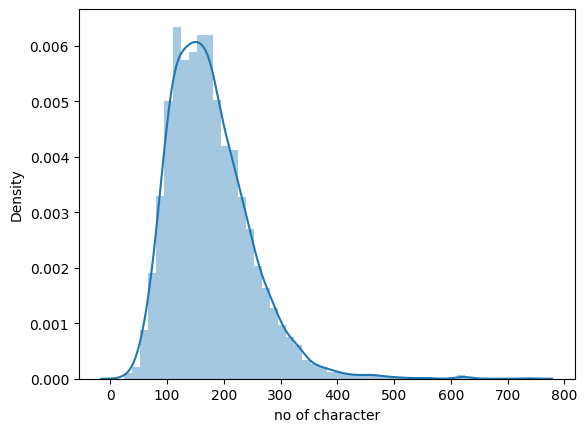

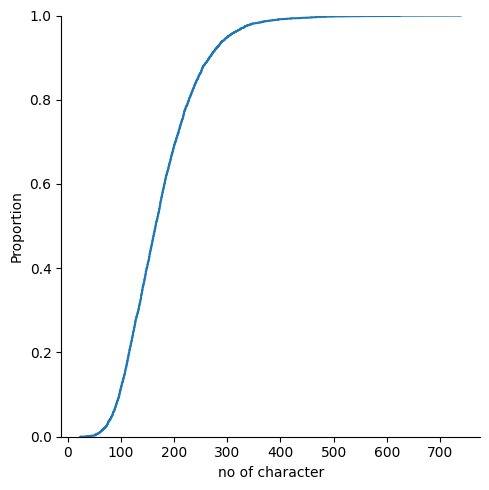

90 % of points has no of char <= 266
91 % of points has no of char <= 272
92 % of points has no of char <= 278
93 % of points has no of char <= 285
94 % of points has no of char <= 292
95 % of points has no of char <= 301
96 % of points has no of char <= 313
97 % of points has no of char <= 327
98 % of points has no of char <= 346
99 % of points has no of char <= 392
100 % of points has no of char <= 739


In [356]:
### no.of character
no_char = m1_data.text.apply(lambda x:len(x.strip())) 
sns.distplot(no_char)
plt.xlabel('no of character')
sns.displot(no_char,kind='ecdf')
plt.xlabel('no of character')
plt.show()
for i in range(90,101):
    print("{} % of points has no of char <= {}".format(i,int(np.percentile(no_char,i)))) #percentile

no of characters in abstract(text) are typical <=384 charecters

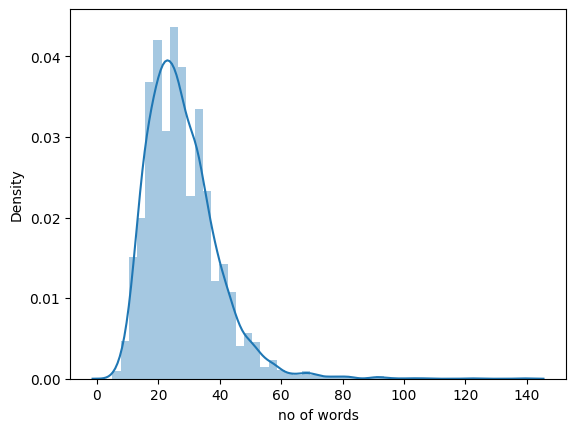

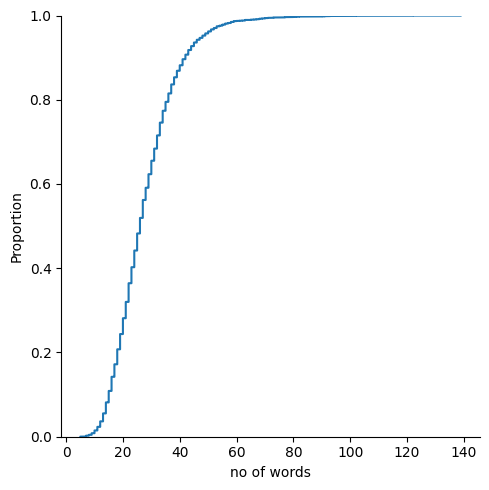

90 % of points has no of char <= 42
91 % of points has no of char <= 43
92 % of points has no of char <= 44
93 % of points has no of char <= 45
94 % of points has no of char <= 46
95 % of points has no of char <= 48
96 % of points has no of char <= 50
97 % of points has no of char <= 52
98 % of points has no of char <= 56
99 % of points has no of char <= 65
100 % of points has no of char <= 139


In [357]:
no_char = m1_data.text.apply(lambda x:len(x.split(' ')))
sns.distplot(no_char)
plt.xlabel('no of words')
sns.displot(no_char,kind='ecdf')
plt.xlabel('no of words')
plt.show()
for i in range(90,101):
    print("{} % of points has no of char <= {}".format(i,int(np.percentile(no_char,i)))) #percentile

no of words in abstract(text) are typical <=60 words

In [358]:
### no of unique words
t = TfidfVectorizer()
t.fit(m1_data.text)
len(t.vocabulary_)

9216

#### Analysis of Tags

##### Total number of unique tags

In [359]:
# no.of unique tags

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(','))
vectorizer.fit_transform(m1_data.labels.values)
tag_dtm = vectorizer.fit_transform(m1_data.labels)
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4443
Number of unique tags : 36


In [360]:
tags = vectorizer.get_feature_names()
tags

['activating invasion and metastasis--',
 'activating invasion and metastasis--invasion',
 'activating invasion and metastasis--metastasis',
 'avoiding immune destruction--',
 'avoiding immune destruction--immune response',
 'avoiding immune destruction--immunosuppression',
 'cellular energetics--',
 'cellular energetics--glycolysis/warburg effect',
 'enabling replicative immortality--',
 'enabling replicative immortality--immortalization',
 'enabling replicative immortality--senescence',
 'evading growth suppressors--by deregulating cell cycle checkpoints--',
 'evading growth suppressors--by deregulating cell cycle checkpoints--cell cycle',
 'evading growth suppressors--by evading contact inhibition',
 'genomic instability and mutation--',
 'genomic instability and mutation--dna damage--',
 'genomic instability and mutation--dna damage--adducts',
 'genomic instability and mutation--dna damage--strand breaks',
 'genomic instability and mutation--dna repair mechanisms',
 'genomic instab

#### Number of times a tag appeared

In [361]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

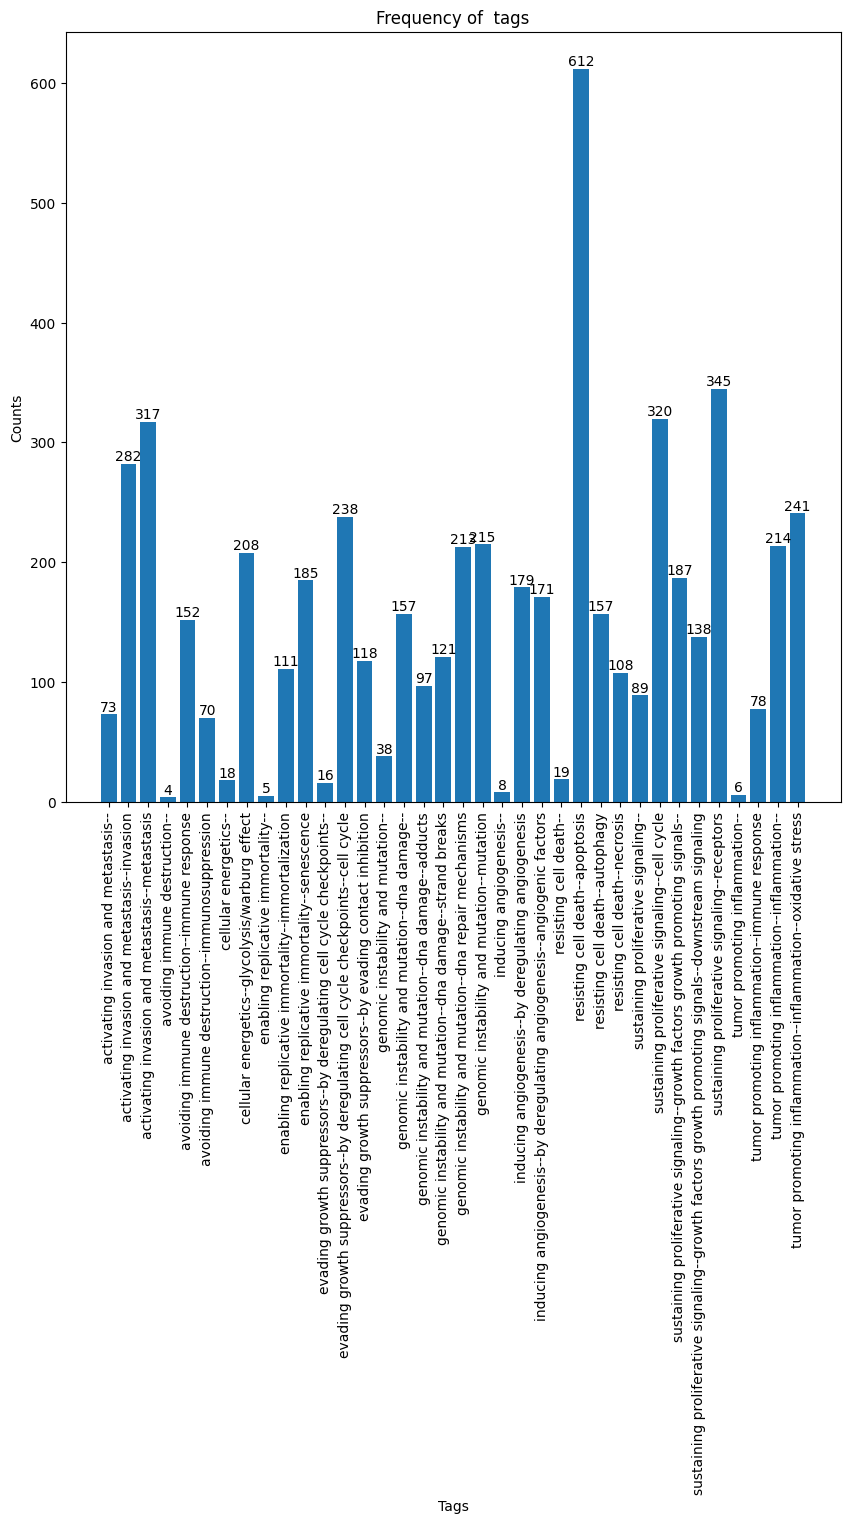

In [426]:
plt.figure(figsize=(10,10))
container = plt.bar(x=list(result.keys()),height=list(result.values()))
plt.bar_label(container)
plt.title('Frequency of  tags')
plt.xticks(rotation=90)
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

### Observations : 
1. resisting cell death--apoptosis occured most number of times (612)
2. avoiding immune destruction-- is less occured tag(4)
3. toatl we have 36 labels

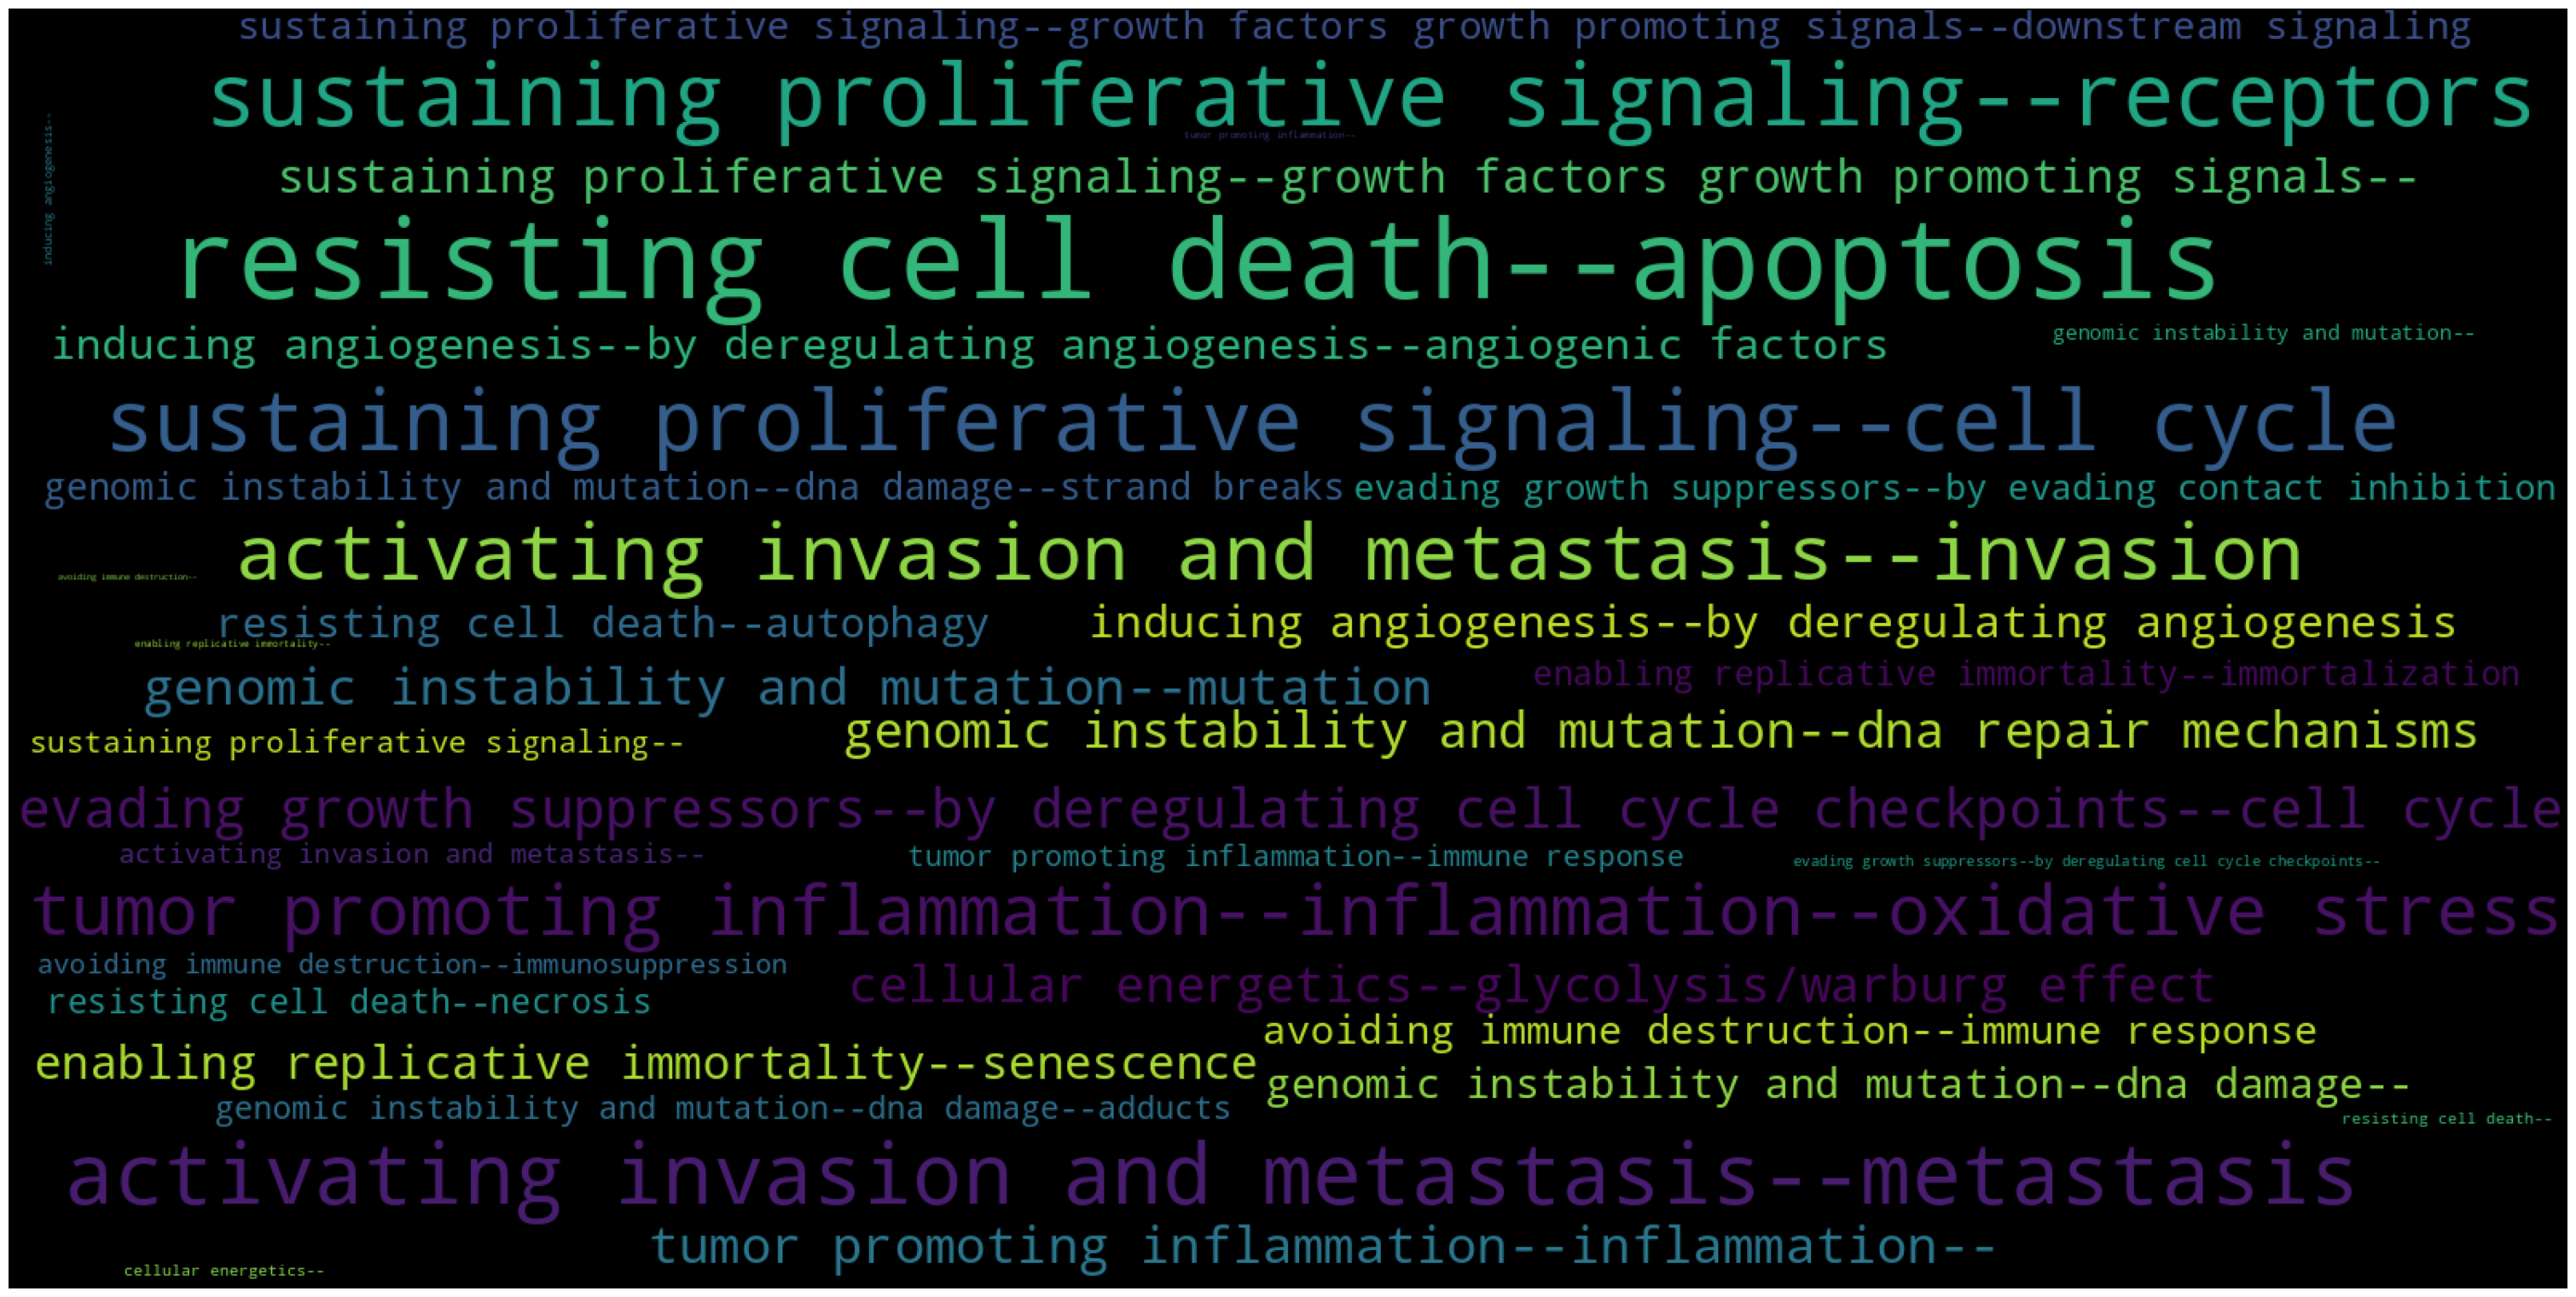

In [363]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/

tup = dict(result.items())
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

### Observations : 
1. resisting cell death--apoptosis occured most number of times (612)
2. avoiding immune destruction-- is less occured tag(4)

### Tags Per Question

In [364]:
tag_quest_count = tag_dtm.sum(axis=1).tolist()
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('we have total {} datapoints.'.format(len(tag_quest_count)))
print(tag_quest_count[:5])

we have total 4443 datapoints.
[2, 1, 1, 2, 1]


In [365]:
print("maximum number of tags per abstract: {}".format(max(tag_quest_count)))
print("minimum number of tags per abstract: {}".format(min(tag_quest_count)))
print("avg. number of tags per abstract: {}".format((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

maximum number of tags per abstract: 6
minimum number of tags per abstract: 1
avg. number of tags per abstract: 1.240153049741166


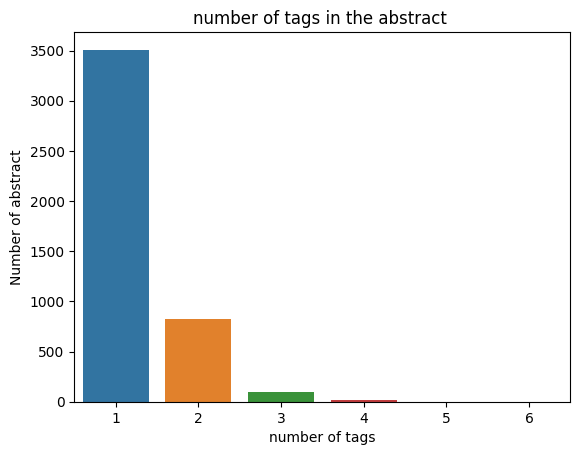

In [366]:
sns.countplot(x=tag_quest_count)
plt.title("number of tags in the abstract ")
plt.xlabel("number of tags")
plt.ylabel("Number of abstract")
plt.show()

### Observations :
1. maximum number of tags per abstract: 6 
2. minimum number of tags per abstract: 1 
3. avg. number of tags per question: 1.2
4. most of the questions are having 1 or 2 tags 

### Cleaning and preprocessing of text

#### removing stop words and lemmatization

In [367]:
def remove_stop_lemit(text):
  
    word_tokens = word_tokenize(text) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w.strip() not in stop_words: 
            filtered_sentence.append(w) 
    #print(filtered_sentence) 
    lemma_word = []
    for w in filtered_sentence:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = "a")
        lemma_word.append(word3)
    lemma_word = " ".join(lemma_word)
    text=lemma_word.strip().lower()
    return text

In [368]:
def preprocess(text):
    text = remove_stop_lemit(text)
    text = re.sub('\(.*\n*.*\)',' ',text) #removing (any words) 
    text = re.sub('[,.?\'\"#$@^&*]+',' ',text)
    text = re.sub('[\n\s\-\\\/]+',' ',text) #removing \n \s - \
    text = re.sub('[,.?\'\"#$@^&*]+',' ',text)
    return text.strip()

#### Train test split

In [369]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(','), binary='true')
multilabel_y = vectorizer.fit_transform(m1_data['labels'])

In [410]:
vectorizer.vocabulary_

{'sustaining proliferative signaling--receptors': 31,
 'sustaining proliferative signaling--growth factors growth promoting signals--downstream signaling': 30,
 'evading growth suppressors--by deregulating cell cycle checkpoints--cell cycle': 12,
 'resisting cell death--apoptosis': 24,
 'avoiding immune destruction--immune response': 4,
 'sustaining proliferative signaling--growth factors growth promoting signals--': 29,
 'avoiding immune destruction--immunosuppression': 5,
 'activating invasion and metastasis--invasion': 1,
 'activating invasion and metastasis--metastasis': 2,
 'activating invasion and metastasis--': 0,
 'tumor promoting inflammation--inflammation--': 34,
 'tumor promoting inflammation--immune response': 33,
 'enabling replicative immortality--senescence': 10,
 'enabling replicative immortality--immortalization': 9,
 'sustaining proliferative signaling--cell cycle': 28,
 'inducing angiogenesis--by deregulating angiogenesis--angiogenic factors': 22,
 'sustaining prolif

In [371]:
X_train,X_test,y_train,y_test = train_test_split(m1_data.text,multilabel_y,test_size=0.2,random_state=20)

In [372]:
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

#### Featurizing data with TfIdf vectorizer

In [374]:
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [375]:
X_train_bow.shape,y_train.shape

((3554, 6893), (3554, 36))

In [376]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC

### model 

1. in high dimenstional space logistic regression or svm preformes better
2. and we have very less no of points then kernels svm is best

In [378]:
### linear svm
classifier_1= OneVsRestClassifier(SGDClassifier(loss='hinge'), n_jobs=-1)
paras={
    'estimator__alpha':[0.000001,0.0001,0.001,0.01,0.1]
}

classifier= GridSearchCV(classifier_1,param_grid=paras,verbose=4,scoring='f1_micro',cv=5)
classifier.fit(X_train_tfidf, y_train)

classifier = classifier.best_estimator_.fit(X_train_bow_n,y_train)
predictions = classifier.predict(X_test_tfidf)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = metrics.precision_score(y_test, predictions, average='micro')
recall = metrics.recall_score(y_test, predictions, average='micro')
f1 = metrics.f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = metrics.precision_score(y_test, predictions, average='macro')
recall = metrics.recall_score(y_test, predictions, average='macro')
f1 = metrics.f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ............estimator__alpha=1e-06;, score=0.729 total time=   0.1s
[CV 2/5] END ............estimator__alpha=1e-06;, score=0.731 total time=   0.1s
[CV 3/5] END ............estimator__alpha=1e-06;, score=0.725 total time=   0.1s
[CV 4/5] END ............estimator__alpha=1e-06;, score=0.745 total time=   0.1s
[CV 5/5] END ............estimator__alpha=1e-06;, score=0.724 total time=   0.1s
[CV 1/5] END ...........estimator__alpha=0.0001;, score=0.751 total time=   0.1s
[CV 2/5] END ...........estimator__alpha=0.0001;, score=0.753 total time=   0.1s
[CV 3/5] END ...........estimator__alpha=0.0001;, score=0.730 total time=   0.1s
[CV 4/5] END ...........estimator__alpha=0.0001;, score=0.735 total time=   0.1s
[CV 5/5] END ...........estimator__alpha=0.0001;, score=0.748 total time=   0.1s
[CV 1/5] END ............estimator__alpha=0.001;, score=0.533 total time=   0.1s
[CV 2/5] END ............estimator__alpha=0.001;,

#### results
1. micro avg f1 score = 0.78
2.  micro avg precision  = 0.89
3. micro avg recall = 0.70

#### adding n_grams

In [405]:
bow_n_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_bow_n= bow_n_vectorizer.fit_transform(X_train)
X_test_bow_n = bow_n_vectorizer.transform(X_test)
X_train_bow_n.shape,y_train.shape

((3554, 44913), (3554, 36))

In [398]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC

In [399]:
### linear svm
classifier_1 = OneVsRestClassifier(SGDClassifier(loss='hinge'))
paras={
    'estimator__alpha':[0.000001,0.0001,0.001,0.01,0.1]
}

classifier = GridSearchCV(classifier_1,param_grid=paras,verbose=4,scoring='f1_micro',cv=5)
classifier.fit(X_train_bow_n, y_train)

classifier = classifier.best_estimator_.fit(X_train_bow_n,y_train)

predictions = classifier.predict(X_test_bow_n)
print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = metrics.precision_score(y_test, predictions, average='micro')
recall = metrics.recall_score(y_test, predictions, average='micro')
f1 = metrics.f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = metrics.precision_score(y_test, predictions, average='macro')
recall = metrics.recall_score(y_test, predictions, average='macro')
f1 = metrics.f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ............estimator__alpha=1e-06;, score=0.741 total time=   0.2s
[CV 2/5] END ............estimator__alpha=1e-06;, score=0.709 total time=   0.2s
[CV 3/5] END ............estimator__alpha=1e-06;, score=0.711 total time=   0.2s
[CV 4/5] END ............estimator__alpha=1e-06;, score=0.729 total time=   0.2s
[CV 5/5] END ............estimator__alpha=1e-06;, score=0.716 total time=   0.2s
[CV 1/5] END ...........estimator__alpha=0.0001;, score=0.748 total time=   0.2s
[CV 2/5] END ...........estimator__alpha=0.0001;, score=0.734 total time=   0.2s
[CV 3/5] END ...........estimator__alpha=0.0001;, score=0.731 total time=   0.3s
[CV 4/5] END ...........estimator__alpha=0.0001;, score=0.727 total time=   0.2s
[CV 5/5] END ...........estimator__alpha=0.0001;, score=0.738 total time=   0.2s
[CV 1/5] END ............estimator__alpha=0.001;, score=0.737 total time=   0.2s
[CV 2/5] END ............estimator__alpha=0.001;,

### Results : 
1. micro avg f1 score = o.77
2.  micro avg precision  = 0.70
3. micro avg recall = 0.67

    performance not improvement

### Scope of improvement

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5860084/

Verb classes (VC): Verb classes group semantically similar predicates together, providing the means to abstract away from individual verbs when faced with data sparsity. We use the hierarchical classification of 399 verbs by Sun and Korhonen (2009) which was automatically acquired from cancer risk assessment literature using clustering.

Named entities (NE): Named entities capture domain specific concepts in texts, providing another way to group words into meaningful categories. We use five named entity types which are particularly relevant to cancer research: Proteins, DNA, RNA, Cell line and Cell type.

Medical Subject Headings (MeSH): A comprehensive controlled vocabulary for indexing journal articles and books in the life sciences. Most abstracts in our dataset contain an associated list of MeSH terms which we employ as features.

Chemical lists (Chem): Hallmark-related processes may involve chemicals. Since most abstracts in our corpus also contain a list of associated chemicals as metadata, we use these as features.

Semantic distance (SD): We construct a semantic vector space model (VSM) to capture the semantic similarity between words that appear in the corpus, and the hallmark labels. We use the approach presented in (Baker et al., 2016a), where we train an artificial neural network (ANN) model that learns an embedded representation of words and labels jointly. We feed the ANN sentences and corresponding hallmark labels; the ANN creates a vector space where each (non-stop) word and hallmark label are presented as points (i.e. an embedded representation). We then use cosine similarity to measure the distance between words occurring in the sentence and a given hallmark label.


adding these features gives better results

### saving model

In [403]:
import joblib

In [412]:
import joblib
joblib.dump(bow_vectorizer, 'flask_app/models/vectorizer.pkl')
joblib.dump(classifier, 'flask_app/models/model.pkl')
joblib.dump(vectorizer.vocabulary_,'flask_app/models/labels_dict.pkl')

['flask_app/models/labels_dict.pkl']

In [428]:
X_train.values[0]

'two patient die direct result metastatic tumor 3 2 year metastasis mix tumor'